
Epoch 1:
Z2: [[0.02]]
A2: [[0.50499983]]
Z3: [[0.15149995]]
A3: [[0.53780271]]
W2: [[0.2]]
W3: [[0.3]]
b2: [[0.]]
b3: [[0.]]
D3: [[0.13119642]]
D2: [[0.00983875]]
grad_W3: [[0.06625417]]
grad_b3: [[0.13119642]]
grad_W2: [[0.00098387]]
grad_b2: [[0.00983875]]

Epoch 2:
Z2: [[0.01503143]]
A2: [[0.50375779]]
Z3: [[0.0688411]]
A3: [[0.51720348]]
W2: [[0.19950806]]
W3: [[0.26687291]]
b2: [[-0.00491937]]
b3: [[-0.06559821]]
D3: [[0.12665076]]
D2: [[0.00844944]]
grad_W3: [[0.06380131]]
grad_b3: [[0.12665076]]
grad_W2: [[0.00084494]]
grad_b2: [[0.00844944]]


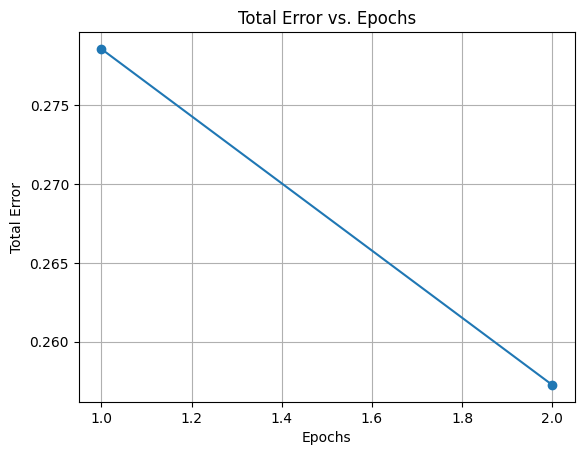

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
A1 = np.array([[0.10]])
W2 = np.array([[0.20]])
W3 = np.array([[0.30]])
b2 = np.array([[0.0]])
b3 = np.array([[0.0]])

R = np.array([[0.01]])

# Learning rate
alpha = 0.5

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Number of epochs
epochs = 2

# Initialize an array to store total errors
errors = np.zeros(epochs)

# Loop through epochs
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}:")

    # Forward pass calculations
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Print forward pass values
    print(f"Z2: {Z2}")
    print(f"A2: {A2}")
    print(f"Z3: {Z3}")
    print(f"A3: {A3}")
    print(f"W2: {W2}")
    print(f"W3: {W3}")
    print(f"b2: {b2}")
    print(f"b3: {b3}")

    # Calculate Deltas
    D3 = (A3 - R) * sigmoid_derivative(Z3)
    D2 = np.dot(W3.T, D3) * sigmoid_derivative(Z2)

    # Print deltas
    print(f"D3: {D3}")
    print(f"D2: {D2}")

    # Calculate gradients
    grad_W3 = np.dot(D3, A2.T)
    grad_b3 = D3
    grad_W2 = np.dot(D2, A1.T)
    grad_b2 = D2

    # Print gradients
    print(f"grad_W3: {grad_W3}")
    print(f"grad_b3: {grad_b3}")
    print(f"grad_W2: {grad_W2}")
    print(f"grad_b2: {grad_b2}")

    # Update weights and biases
    W2 = W2 - alpha * grad_W2
    b2 = b2 - alpha * grad_b2

    W3 = W3 - alpha * grad_W3
    b3 = b3 - alpha * grad_b3

    # Calculate total error and store in array
    total_error = np.sum((A3 - R) ** 2)
    errors[epoch] = total_error

# Plot the graph of total errors
plt.figure()
plt.plot(range(1, epochs + 1), errors, '-o')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Total Error vs. Epochs')
plt.grid(True)
plt.show()